# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T05:56:15.790974+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

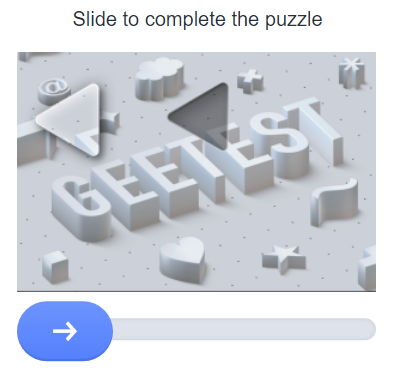

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "Text instruction 'Slide to complete the puzzle' is displayed on a plain background.")
    describe(1, "A 3D puzzle image with the word 'GEETEST' and various shapes, including a triangular cutout, is shown.")
    describe(2, "A horizontal slider with a blue button containing a white arrow is displayed.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides instructions for interacting with the puzzle in Frame 1.")
    relate(1, 2, "Frame 1 is the puzzle to be solved, and Frame 2 is the slider used to complete the puzzle.")
    relate(0, 2, "Frame 0's instruction implies using the slider in Frame 2 to solve the puzzle in Frame 1.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("To solve the task, the user must slide the button in Frame 2 to align the triangular cutout in Frame 1 with its correct position, completing the puzzle.")

## Structure Abstraction

In [ ]:
def stage2(frames: list):
    # Frame 0: Instructions, not interactable
    # Frame 1: Puzzle, dependent on Frame 2, not interactable
    # Frame 2: Contains the slider, which is interactable

    # Get the slider element in Frame 2
    slider_element = frames[2].get_element(position='left', details='blue arrow button')
    
    # Mark the slider element as SLIDEABLE_X
    slider_element.set_element_as(interactable='SLIDEABLE_X')

## Solution Composition

In [ ]:
def stage3(frames: list) -> None:
    # Get the slider handle from Frame 2
    slider_handle = frames[2].get_interactable(0)

    # Slide the handle to the right while observing changes in Frame 1
    observations = slide_x(slider_handle, direction="right", observe_frame=frames[1])

    # Extract images from observations
    images = [choice.image for choice in observations]

    # Rank the images based on the task objective: completing the puzzle
    ranked_ids = rank(images, task_objective="Complete the puzzle")

    # Select the best choice based on the highest rank
    best_choice = observations[ranked_ids[0]]

    # Refine the search around the best choice
    refined_choices = best_choice.refine()

    # Further rank the refined choices
    refined_images = [choice.image for choice in refined_choices]
    refined_ranked_ids = rank(refined_images, task_objective="Complete the puzzle")

    # Select the best refined choice
    final_choice = refined_choices[refined_ranked_ids[0]]

    # Release the slider at the best position
    final_choice.release()

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Complete the puzzle.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Puzzle piece must fit perfectly on top of slot.
2. Shapes align properly: Geometric patterns should connect smoothly without distortion.
3. Consistent colors and shading: No abrupt color shifts or breaks between parts.
4. No fragmentation: Image should appear cohesive without misaligned pieces.
'''

Image 0 Image 1 Image 2 Image 3 Image 4
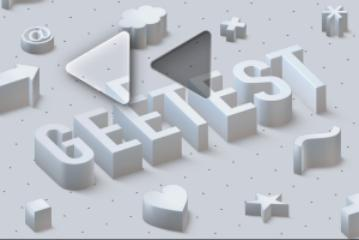
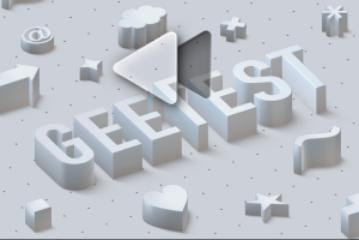
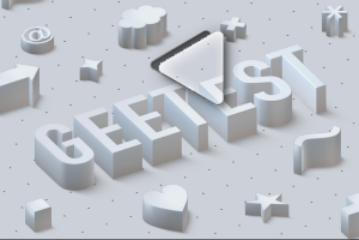
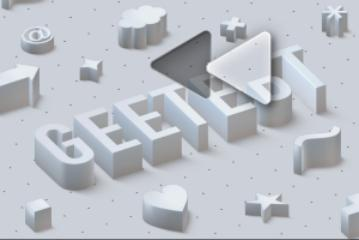
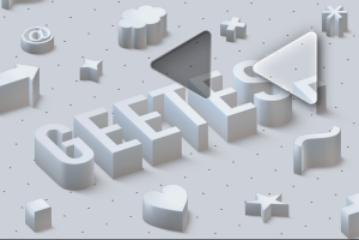

In [ ]:
IMAGES = 5

In [ ]:
RESPONSE = '''
rank(ids=[2, 1, 0, 3, 4])
'''
TIME = 3.679265676997602
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 1418
PROMPT_TOKENS = 1401
COMPLETION_TOKENS = 17

---

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Complete the puzzle.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Puzzle piece must fit perfectly on top of slot.
2. Shapes align properly: Geometric patterns should connect smoothly without distortion.
3. Consistent colors and shading: No abrupt color shifts or breaks between parts.
4. No fragmentation: Image should appear cohesive without misaligned pieces.
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6 Image 7 Image 8 Image 9
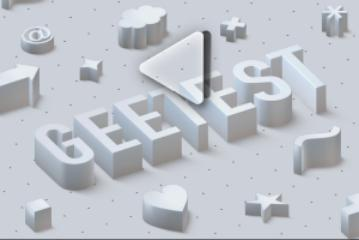
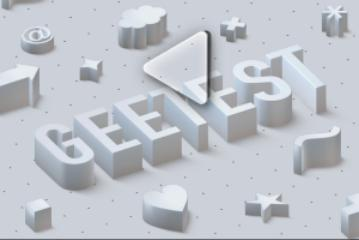
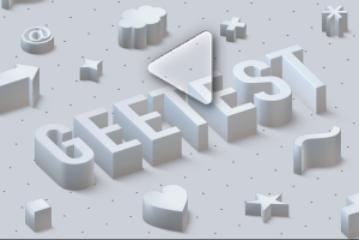
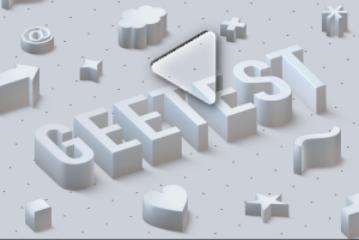
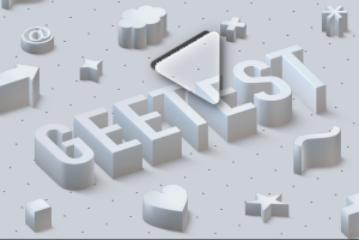
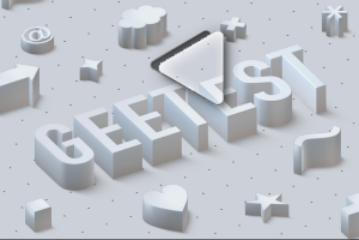
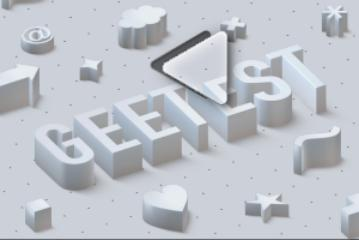
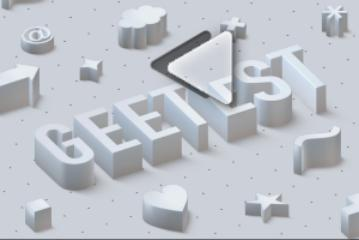
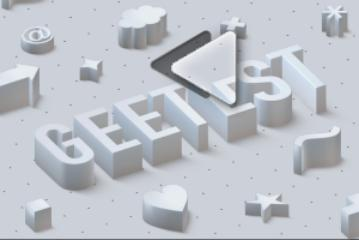
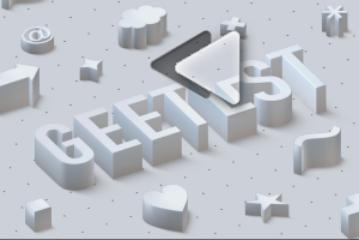

In [ ]:
IMAGES = 10

In [ ]:
RESPONSE = '''
rank(ids=[2, 1, 3, 4, 5, 6, 7, 8, 9, 0])
'''
TIME = 4.716072866693139
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2723
PROMPT_TOKENS = 2691
COMPLETION_TOKENS = 32

---